<a href="https://colab.research.google.com/github/JuhiNayak/Machine-Learning/blob/master/tensorflow_K_means_JuhiNayak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 257: Assignment 1

Author: Juhi Nayak

Applying k-means algorithm using Tensorflow

Dataset Source: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv

Reference: https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/compat/v1/estimator/experimental/KMeans?hl=en#example

Import libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

upload file form local drive

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasets_bank_laon.csv to datasets_bank_laon.csv


Read csv file and store in dataframe

In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['datasets_bank_laon.csv']), encoding='latin-1')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Preparation: Handle Null values

In [ ]:
df.fillna(df.mean(), inplace=True)
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Calculate the total income and store in a new column in dataframe

In [ ]:

totalIncome = df["ApplicantIncome"] + df["CoapplicantIncome"]
df["totalIncome"] = totalIncome
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


Scattering the Applicant Total Income and LoanAmount values in a plot

[[5849.          146.41216216]
 [6091.          128.        ]
 [3000.           66.        ]
 ...
 [8312.          253.        ]
 [7583.          187.        ]
 [4583.          133.        ]]


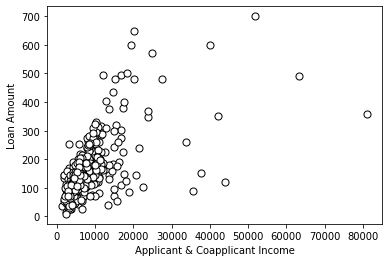

In [ ]:
points = df.iloc[:,[13,8]].values
print(points)
plt.scatter(
   points[:, 0], points[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel('Applicant & Coapplicant Income')
plt.ylabel('Loan Amount')
plt.show()

In [ ]:
def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(x, dtype=tf.float32), num_epochs=1)

Apply k-means algorithm

In [ ]:
num_clusters = 3
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpilqeg8s8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Train the Model

In [ ]:
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  if previous_centers is not None:
    print('delta:', cluster_centers - previous_centers)
  previous_centers = cluster_centers
  print('score:', kmeans.score(input_fn))
print('cluster centers:', cluster_centers)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpilqeg8s8/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1...
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpilqeg8s8/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1...
INFO:tensorflow:Loss for final step: None.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-01T00:09:11Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpilqeg8s8/model.ckpt-1
INFO:tensorflow:Running local_

 Map the input points to their clusters

In [ ]:
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(x):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
  print('point:', point, 'is in cluster', cluster_index, 'centered at', center)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpilqeg8s8/model.ckpt-19
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
point: [5849.          146.41216216] is in cluster 1 centered at [3806.6584   129.36009]
point: [4583.  128.] is in cluster 1 centered at [3806.6584   129.36009]
point: [3000.   66.] is in cluster 1 centered at [3806.6584   129.36009]
point: [2583.  120.] is in cluster 1 centered at [3806.6584   129.36009]
point: [6000.  141.] is in cluster 1 centered at [3806.6584   129.36009]
point: [5417.  267.] is in cluster 1 centered at [3806.6584   129.36009]
point: [2333.   95.] is in cluster 1 centered at [3806.6584   129.36009]
point: [3036.  158.] is in cluster 1 centered at [3806.6584   129.36009]
point: [4006.  168.] is in cluster 1 centered at [3806.6584   129.36009]
point: [12841.   349.] is in cluster 0 centered at [12381.61 

Plot the points and centers

Text(0, 0.5, 'Loan Amount')

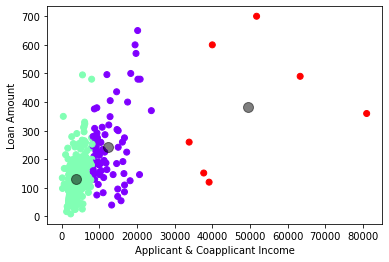

In [ ]:
plt.scatter(x[:,0], x[:,1], c=cluster_indices, cmap='rainbow')

centers = kmeans.cluster_centers()
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
plt.xlabel('Applicant & Coapplicant Income')
plt.ylabel('Loan Amount')

The dataset has some useful columns which can help to train the data such that it can predict whether the applicant is capable of having the loan from the bank for the requested amount based on the Applicant and Co-applicant income and Loan amount term.

On comparing Scikit and Tensorflow libraries, I couldn't find any difference in the clustering result. The result and the conclusion are almost the same.